In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
from random import choice 


$$ \begin{bmatrix}
rcos(\theta + \psi + \omega t) & -rsin(\theta + \psi + \omega t)\\
rsin(\theta + \psi + \omega t) & rcos(\theta + \psi + \omega t)\\
\end{bmatrix}
$$ 
$$ = $$
$$ e^{i\theta}e^{i\psi}e^{i\omega t}    $$

Iterate rotation 
$$ e^{i\theta_{t+1}} = e^{i\omega t}e^{i(\theta_{t}+\psi)
}$$

Laplace oscillator:
$$ e^{st} = e^{\lambda}e^{i\omega t}$$ 
Giving a damped oscillator
Making this fall into a resting state may be challegning
I would also like them to have some kind of action potential, but thats for later.

Goals 
- two oscillators influence one another
- achieve inhibition 
- Create network
- explore driving
- explore error functions and network tuning



In [48]:
from numpy import zeros_like
from numpy import pi, cos, sin

class Network: 
    def __init__(self,N) -> None:
        self.N = N
        self.Nodes = {}
        for i in range(N): # builds the network - needs power law for location and natfreq - needs Gaussian/uniform for phase.
            self.Nodes[i] = Oscillator(2,pi*i,0,[i,0,0])
        self.adjacency = np.zeros([N,N])
        self.coupling = np.zeros([N,N])
        

    def Connect(self,a,P_inhib):
        # -a is power law exponent
        for i in range(self.N-1):
            for j in range(i+1,self.N): 
                if j != i:
                    pool = np.zeros([10000,1])
                    inhib_pool = np.ones([10000,1])
                    xi = self.Nodes[i].location
                    xj = self.Nodes[j].location 
                    s = np.abs(xi-xj)
                    mag = np.sqrt(s[0]**2 + s[1]**2 + s[2]**2 )
                    prob_connect = 1/(mag**a+1) # connection law. +1 is offset to normalise ## CHANGE to control connectivity
                    connect_num = np.round(len(pool)*prob_connect)
                    pool[1:int(connect_num)] = 1
                    np.random.shuffle(pool)
                    inhib_num = np.round(len(pool)*P_inhib)
                    pool[1:int(inhib_num)] = -1
                    np.random.shuffle(inhib_pool)
                    self.coupling[i,j] = (1/mag)*pool[np.random.randint(0,len(pool))]*inhib_pool[np.random.randint(0,len(pool))]
                    self.coupling[j,i] = (1/mag)*pool[np.random.randint(0,len(pool))]*inhib_pool[np.random.randint(0,len(pool))]
                else:
                    continue


                # pick ith oscillator. Include self connections???? 
    def Manual_connect(self,node1,node2,weight):
        self.coupling[node1,node2] = weight

    def Run(self, time):
        # runs network
        self.state = np.zeros([len(time),1,self.N]) # Time series of XY for each oscillator n 
        for t in time: 
            # Build influence vector containing the effect of coupled oscillators on their downstreams
            I = np.dot(self.adjacency,self.contributions) # dots two and adds them
            for i in range(self.N): #fro each oscillator
                # look at all neighbours and interact with correct oscillator
                self.Nodes[i].Spin(t)
                






class Oscillator:
    def __init__(self,r,nat,phase,location) -> None:
        self.nat = nat 
        self.phase = phase
        self.r = r
        self.location = location
        self.current =  r*cos(self.theta) + r*sin(self.theta)j# [[r*cos(phase),r*sin(phase)],[-r*sin(phase),r*cos(phase)]] # starts at non zero location

    # def Connect(self,dist):
    #     self.connections

    def Spin(self,t,inf):
        # LEFT HAND MULTIPLY - Matrix mult doesnt commute - WX /= XW
        theta_now = self.nat*t+self.phase
        self.current = self.r*cos(theta_now) +self.r*sin(theta_now)j
        return self.current

        
    

In [36]:
test = Oscillator(0.5,-2*pi,pi,[0,0,0])

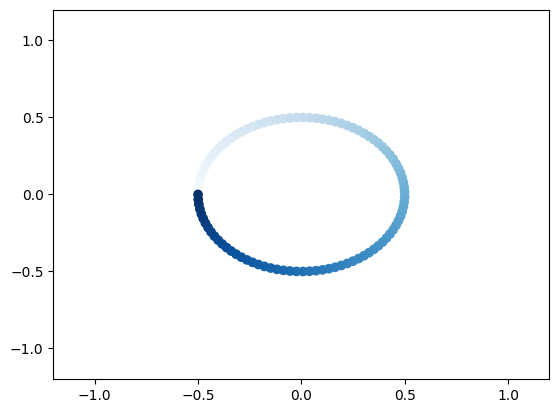

In [37]:
time = np.linspace(0,1,num=100)

i = 0
results=len(time)*[None]
for t in time:
    results[i] = test.Spin(t)
    i += 1

XY = np.zeros([len(results),2])
for i in range(len(results)):
    XY[i,0] = (results[i][0])[0]
    XY[i,1] = (results[i][0])[1]
    
XY[np.abs(XY) < 0.00001] = 0
plt.scatter(XY[:,0],XY[:,1] , c=range(0,len(results)), cmap=plt.get_cmap('Blues')) # 1:0.1:len
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.show()

In [38]:
# Connect two oscillators

test2 = Oscillator(0.9,pi,0,[1,0,0])



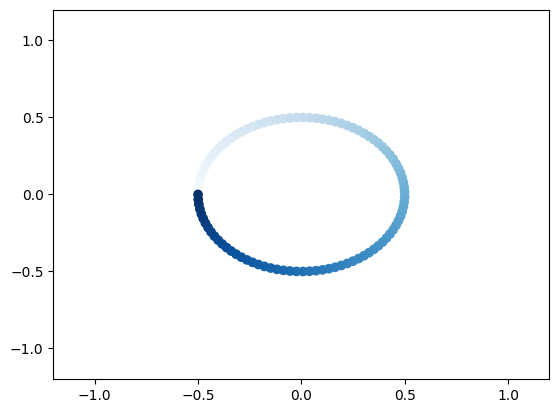

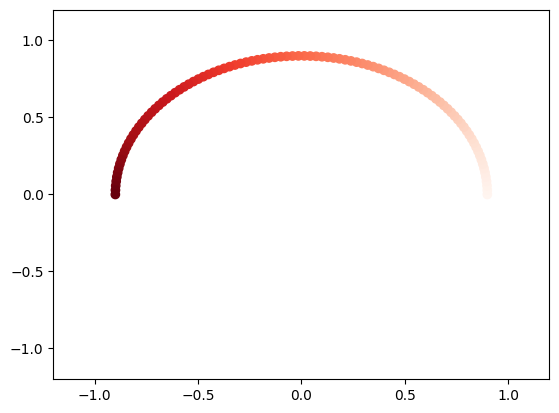

In [39]:
time = np.linspace(0,1,num=100)

i = 0
results=len(time)*[None]
results2=len(time)*[None]
for t in time:
    results[i] = test.Spin(t)
    results2[i] = test2.Spin(t)
    i += 1

XY = np.zeros([len(results),2])
XY2= np.zeros([len(results),2])
for i in range(len(results)):
    XY[i,0] = (results[i][0])[0]
    XY[i,1] = (results[i][0])[1]
    XY2[i,0] = (results2[i][0])[0]
    XY2[i,1] = (results2[i][0])[1]
    
XY[np.abs(XY) < 0.00001] = 0
plt.scatter(XY[:,0],XY[:,1] , c=range(0,len(results)), cmap=plt.get_cmap('Blues')) # 1:0.1:len

plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.show()

plt.scatter(XY2[:,0],XY2[:,1] , c=range(0,len(results)), cmap=plt.get_cmap('Reds')) # 1:0.1:len
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.show()

In [40]:
Netty = Network(50)

In [41]:
Netty.Nodes[1].location 



[1, 0, 0]

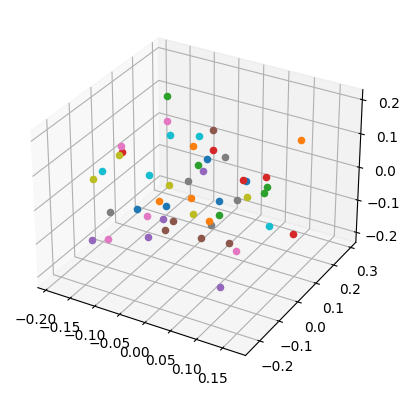

In [46]:
# Put nodes spatially distrubuted with a distribution
# Gaussian dist 
a = 1 # currently for pink law
mu, sigma = 0, 0.1
for i in range(len(Netty.Nodes)):
    x = np.random.normal(mu,sigma,1)
    y = np.random.normal(mu,sigma,1)
    z = np.random.normal(mu,sigma,1)
    Netty.Nodes[i].location = np.array([x,y,z])

#plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(len(Netty.Nodes)):
    ploot = Netty.Nodes[i].location
    ax.scatter(ploot[0],ploot[1],ploot[2])

In [47]:
# connect nodes probabilistically, plot 
# using a power law distribution Prob(connect) = 1/dist 
# so adjacency matrix is built using this
Netty.Connect(1)


[0.950477]
[[0.02388212]
 [0.0451917 ]
 [0.01010495]]
[9505.]
[0.77881114]
[[0.00548664]
 [0.28364962]
 [0.01317278]]
[7788.]
[0.76173752]
[[0.22240067]
 [0.20401514]
 [0.08217175]]
[7617.]
[0.94519889]
[[0.03553267]
 [0.03385178]
 [0.03087036]]
[9452.]
[0.78934507]
[[0.10407574]
 [0.18970843]
 [0.15620557]]
[7893.]
[0.8458271]
[[0.08287922]
 [0.05175419]
 [0.15387207]]
[8458.]
[0.88302527]
[[0.08367969]
 [0.064682  ]
 [0.07976441]]
[8830.]
[0.89211141]
[[0.1129737 ]
 [0.01144328]
 [0.04161207]]
[8921.]
[0.90464249]
[[0.01645913]
 [0.0948456 ]
 [0.04294738]]
[9046.]
[0.83548366]
[[0.07624115]
 [0.15116635]
 [0.10054929]]
[8355.]
[0.87972148]
[[0.10775916]
 [0.07864897]
 [0.02992647]]
[8797.]
[0.86910501]
[[0.12409953]
 [0.08495655]
 [0.0080466 ]]
[8691.]
[0.77945949]
[[0.1349163 ]
 [0.24821013]
 [0.01563789]]
[7795.]
[0.88887848]
[[0.06368852]
 [0.06615446]
 [0.08482719]]
[8889.]
[0.81499836]
[[0.00431242]
 [0.18252014]
 [0.13488936]]
[8150.]
[0.86342882]
[[0.04143894]
 [0.02604891]
 [

In [45]:
# coupling strengths proportional to distance#
# plt lines and weight by magnitude
time = np.linspace(0,1,num=100)
Netty.Run(time)